In [1]:
# Import necessary modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Read the data
epex = pd.read_csv('epex_day_ahead_price.csv')
spot = pd.read_csv('spot_intraday_price.csv')
system = pd.read_csv('systemprice.csv')

In [3]:
epex.head()

,timestamp,apx_da_hourly
0,2019-03-31 23:00:00+00:00,26.43
1,2019-03-31 23:30:00+00:00,26.43
2,2019-04-01 00:00:00+00:00,29.24
3,2019-04-01 00:30:00+00:00,29.24
4,2019-04-01 01:00:00+00:00,35.10


In [4]:
spot.head()

,timestamp,SP,spot_price
0,2019-01-02 00:00:00+00:00,1.0,40.01
1,2019-01-02 00:30:00+00:00,2.0,43.27
2,2019-01-02 01:00:00+00:00,3.0,42.72
3,2019-01-02 01:30:00+00:00,4.0,52.17
4,2019-01-02 02:00:00+00:00,5.0,53.44


In [5]:
system.head()

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
0,08/04/2019,1,52.25,52.25,195.4258
1,08/04/2019,2,51.90,51.90,62.2486
2,08/04/2019,3,32.76,32.76,-40.7968
3,08/04/2019,4,50.85,50.85,22.6933
4,08/04/2019,5,51.40,51.40,186.5092


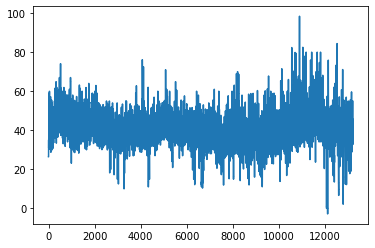

In [6]:
# Plot the epex prices in 2019.
epex["timestamp"]=pd.to_datetime(epex["timestamp"])
epex['year'] = epex['timestamp'].dt.year
epex_2019 = epex[epex["year"].isin([2019])]
plt.plot(epex_2019.apx_da_hourly)

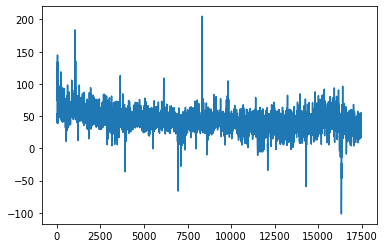

In [7]:
# Plot the spot prices in 2019.
spot["timestamp"]=pd.to_datetime(spot["timestamp"])
spot['year'] = spot['timestamp'].dt.year
spot_2019 = spot[spot["year"].isin([2019])]
plt.plot(spot_2019.spot_price)

In [8]:
# Separate the dataset according to the year.
epex["timestamp"]=pd.to_datetime(epex["timestamp"])
epex['year'] = epex['timestamp'].dt.year
epex_2019 = epex[epex["year"].isin([2019])]
epex_2020 = epex[epex["year"].isin([2020])]
epex_2021 = epex[epex["year"].isin([2021])]

In [9]:
# Assign each time point in a year with an unique integer in order to use time to train the model.
number = [i for i in range(len(epex_2020['timestamp']))]
epex_2020['number'] = number
epex_2020['square'] = np.array(number)**2

<ipython-input-9-5b83fe4d350b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2020['number'] = number
<ipython-input-9-5b83fe4d350b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2020['square'] = np.array(number)**2


In [10]:
epex_2020[epex_2020['timestamp']=='2020-03-31 23:00:00+00:00']

,timestamp,apx_da_hourly,year,number,square
17568,2020-03-31 23:00:00+00:00,24.53,2020,4366,19061956


In [11]:
# Assign each time point in a year with a unique integer.
number = [i for i in range(4366,len(epex_2020['timestamp']))]
epex_2019['number'] = number
epex_2019['square'] = np.array(number)**2

<ipython-input-11-28f0194b71d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2019['number'] = number
<ipython-input-11-28f0194b71d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2019['square'] = np.array(number)**2


In [12]:
# Assign each time point in a year with an unique integer.
number = [i for i in range(len(epex_2021['timestamp']))]
epex_2021['number'] = number
epex_2021['square'] = np.array(number)**2

<ipython-input-12-05624bc2708d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2021['number'] = number
<ipython-input-12-05624bc2708d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epex_2021['square'] = np.array(number)**2


In [13]:
# Concatenate three datasets into one big dataset.
frames = [epex_2019, epex_2020, epex_2021]
new_epex = result = pd.concat(frames)
new_epex

,timestamp,apx_da_hourly,year,number,square
0,2019-03-31 23:00:00+00:00,26.43,2019,4366,19061956
1,2019-03-31 23:30:00+00:00,26.43,2019,4367,19070689
2,2019-04-01 00:00:00+00:00,29.24,2019,4368,19079424
3,2019-04-01 00:30:00+00:00,29.24,2019,4369,19088161
4,2019-04-01 01:00:00+00:00,35.10,2019,4370,19096900
...,...,...,...,...,...
47853,2021-12-22 21:30:00+00:00,315.00,2021,17083,291828889
47854,2021-12-22 22:00:00+00:00,276.85,2021,17084,291863056
47855,2021-12-22 22:30:00+00:00,276.85,2021,17085,291897225
47856,2021-12-22 23:00:00+00:00,325.40,2021,17086,291931396


In [14]:
raw_data = new_epex
raw_data

,timestamp,apx_da_hourly,year,number,square
0,2019-03-31 23:00:00+00:00,26.43,2019,4366,19061956
1,2019-03-31 23:30:00+00:00,26.43,2019,4367,19070689
2,2019-04-01 00:00:00+00:00,29.24,2019,4368,19079424
3,2019-04-01 00:30:00+00:00,29.24,2019,4369,19088161
4,2019-04-01 01:00:00+00:00,35.10,2019,4370,19096900
...,...,...,...,...,...
47853,2021-12-22 21:30:00+00:00,315.00,2021,17083,291828889
47854,2021-12-22 22:00:00+00:00,276.85,2021,17084,291863056
47855,2021-12-22 22:30:00+00:00,276.85,2021,17085,291897225
47856,2021-12-22 23:00:00+00:00,325.40,2021,17086,291931396


In [15]:
# Shuffle the data.
raw_data = raw_data.drop(['timestamp', 'year'], axis = 1)
data = raw_data.sample(frac=1).reset_index(drop=True)
data

,apx_da_hourly,number,square
0,31.40,4658,21696964
1,139.00,9731,94692361
2,59.00,6469,41847961
3,26.47,8044,64705936
4,105.00,9908,98168464
...,...,...,...
47853,26.57,9262,85784644
47854,14.52,2307,5322249
47855,38.09,1863,3470769
47856,17.00,8234,67798756


In [16]:
# Split the dataset into training and test set.
train_data = data.sample(frac=0.85, random_state=0)
test_data = data.drop(train_data.index)

In [17]:
# Separate features and labels.
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('apx_da_hourly')
test_labels = test_features.pop('apx_da_hourly')

In [18]:
# Define the normaliser.
normaliser = tf.keras.layers.Normalization(axis = -1)
normaliser.adapt(train_features)
print('variance of features:', normaliser.variance.numpy()[0])
print('mean of features: ', normaliser.mean.numpy()[0])

variance of features: [2.3197804e+07 8.0412407e+15]
mean of features:  [9.3148193e+03 1.0996361e+08]


In [19]:
# Use linear regression
linear_model = tf.keras.Sequential([
                normaliser,
                tf.keras.layers.Dense(1)
    ]
    )

myPredic = train_features.to_numpy()[[0],:]
print(linear_model.predict(myPredic)[0][0])

-2.3862703


In [20]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


In [21]:
# Use gradient descent as the optimizer.
linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mean_squared_error')

In [22]:
labelmean = np.mean(train_labels)
labelstd = np.std(train_labels)
newtrain = (train_labels-labelmean)/labelstd
newtrain

21801   -0.149407
10176   -0.090284
33547   -0.506536
30362   -0.259628
3151     1.071053
           ...   
32034    0.486865
23764   -0.470358
38023    0.002623
7966     0.388328
16187   -0.464165
Name: apx_da_hourly, Length: 40679, dtype: float64

In [23]:
# Train the model.
history = linear_model.fit(
    train_features,
    newtrain,
    epochs=50,
    validation_split = 0.2)

Epoch 1/50
1017/1017 [==============================] - 1s 657us/step - loss: 0.8697 - val_loss: 1.1828
Epoch 2/50
1017/1017 [==============================] - 1s 657us/step - loss: 0.8675 - val_loss: 1.2070
Epoch 3/50
1017/1017 [==============================] - 1s 545us/step - loss: 0.8665 - val_loss: 1.1799
Epoch 4/50
1017/1017 [==============================] - 1s 700us/step - loss: 0.8660 - val_loss: 1.1836
Epoch 5/50
1017/1017 [==============================] - 1s 558us/step - loss: 0.8674 - val_loss: 1.1901
Epoch 6/50
1017/1017 [==============================] - 1s 722us/step - loss: 0.8660 - val_loss: 1.1827
Epoch 7/50
1017/1017 [==============================] - 1s 625us/step - loss: 0.8661 - val_loss: 1.2026
Epoch 8/50
1017/1017 [==============================] - 1s 558us/step - loss: 0.8664 - val_loss: 1.1797
Epoch 9/50
1017/1017 [==============================] - 1s 558us/step - loss: 0.8663 - val_loss: 1.1893
Epoch 10/50
1017/1017 [==============================] - 1s 802u

In [24]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

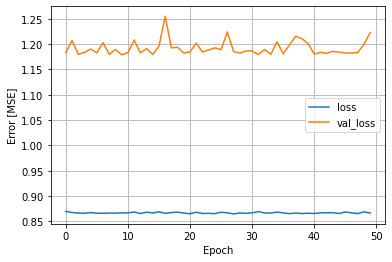

In [25]:
# Plot the error in training set and the error in validation set.
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

225/225 [==============================] - 0s 417us/step - loss: 1.0608
1.0607786178588867


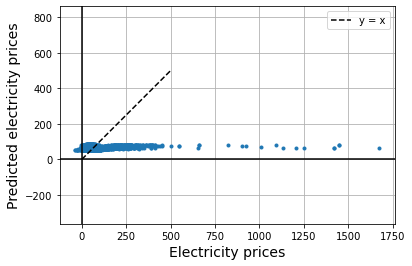

In [26]:
# Plot graph to visualize the efficiency of the model.
norm_test_labels = (test_labels - labelmean)/labelstd
print(linear_model.evaluate(test_features, norm_test_labels))


predictions = linear_model.predict(test_features)[:,0]*labelstd + labelmean

plt.plot(test_labels.to_numpy(), (predictions), marker = '.', linestyle = 'None')
plt.axvline(0,color='Black')
plt.axhline(0,color='Black')
plt.axis('equal')
xrange = np.arange(0,500)
plt.plot(xrange,xrange,color='Black', linestyle='--',label='y = x')

plt.legend()
ax = plt.gca()
ax.set_xlabel('Electricity prices', fontsize =14)
ax.set_ylabel('Predicted electricity prices', fontsize =14)
plt.grid()

# Question 2 and 3 explaination

Here linear regression may not be the best model to use to predict the electricity prices and thus the time to charge and discharge the bettary since we only have one feature (time) to use to fit the model. If we have more time, we could collect more data and use them as additional features to train the model. For example, weather and seasons are also important features that could affect the electricity prices. Due to time constraints, we are not able to show this here.

Furthermore, if time permits, we could focus more on unsupervised learning and reinforcement learning. For unsupervised learning, one could try to cluster the data as three groups. Then it is possible to calculate under what situation it is better to charge, discharge or do nothing. For reinforcement learning, one could try to create an intelligent agent and explicitly calculate the state and revenue.